<a href="https://colab.research.google.com/github/N1colasFD/mixed-analytics-for-data-Science/blob/main/BinanceApi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importación de los paquetes
from pandas.io.json import json_normalize
import urllib.request, json 
import numpy as np
import pandas as pd 
import seaborn as sns
import requests
import json
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#Automcompletar rápido
%config IPCompleter.greedy=True

#Display 6 registros
pd.options.display.min_rows = 6

### CONSUMIENDO API DE BINANCE

In [ ]:
#llamamos al metodo para leer archivos Json desde una Web 📖 
with urllib.request.urlopen('https://cryptingup.com/api/markets') as url:
    data = json.loads(url.read().decode())
    df_B = pd.DataFrame(json_normalize(data, 'markets'));
df_B

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  after removing the cwd from sys.path.


,exchange_id,symbol,base_asset,quote_asset,price_unconverted,price,change_24h,spread,volume_24h,status,...,quote.CAD.price,quote.CAD.volume_24h,quote.USD.price,quote.USD.volume_24h,quote.AUD.price,quote.AUD.volume_24h,quote.NZD.price,quote.NZD.volume_24h,quote.EUR.price,quote.EUR.volume_24h
0,BINANCE,BTC-USDT,BTC,USDT,16059.685000,16042.581438,-0.921125,0.003300,4.520995e+09,recent,...,21502.783168,6.059746e+09,16042.581438,4.520995e+09,24156.512382,6.807599e+09,26086.199974,7.351408e+09,15620.019843,4.401912e+09
1,BINANCE,BTC-BUSD,BTC,BUSD,16041.820000,16049.840910,-0.878828,0.016705,2.588261e+09,recent,...,21512.513450,3.469193e+09,16049.840910,2.588261e+09,24167.443511,3.897337e+09,26098.004310,4.208667e+09,15627.088100,2.520086e+09
2,BINANCE,BUSD-USDT,BUSD,USDT,1.001150,1.000084,-0.024965,0.009988,1.078164e+09,recent,...,1.340469,1.445124e+09,1.000084,1.078164e+09,1.505901,1.623472e+09,1.626196,1.753159e+09,0.973742,1.049765e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,BINANCE,SAND-USDT,SAND,USDT,0.540350,0.539775,-1.467907,0.018505,1.809488e+07,recent,...,0.723490,2.425360e+07,0.539775,1.809488e+07,0.812779,2.724682e+07,0.877706,2.942337e+07,0.525557,1.761826e+07
98,BINANCE,FIL-USDT,FIL,USDT,4.215000,4.210511,0.357143,0.236967,1.808558e+07,recent,...,5.643587,2.424114e+07,4.210511,1.808558e+07,6.340081,2.723281e+07,6.846544,2.940825e+07,4.099606,1.760921e+07
99,BINANCE,LTC-BTC,LTC,BTC,0.004247,68.126778,13.085729,0.023540,1.751718e+07,recent,...,91.314190,2.347927e+07,68.126778,1.751718e+07,102.583575,2.637692e+07,110.778229,2.848398e+07,66.332319,1.705578e+07


In [ ]:
#observamos la informacion en concreto que nos trae el Dataset y podemos aplicar calidad de datos
'''correguir: 
1. Nombres de la variables que nos dicultaran la lectura
2. No recono las fechas
3. eliminar variables innecesarias para el analisis 
4. variable 'Price' pasarlo a Enteros'''

df_B.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   exchange_id           100 non-null    object 
 1   symbol                100 non-null    object 
 2   base_asset            100 non-null    object 
 3   quote_asset           100 non-null    object 
 4   price_unconverted     100 non-null    float64
 5   price                 100 non-null    float64
 6   change_24h            100 non-null    float64
 7   spread                100 non-null    float64
 8   volume_24h            100 non-null    float64
 9   status                100 non-null    object 
 10  created_at            100 non-null    object 
 11  updated_at            100 non-null    object 
 12  quote.GBP.price       100 non-null    float64
 13  quote.GBP.volume_24h  100 non-null    float64
 14  quote.JPY.price       100 non-null    float64
 15  quote.JPY.volume_24h  10

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Eliminacion directa de colummnas
df_B.drop(columns = ['quote.NZD.price','quote.NZD.volume_24h','quote.AUD.price','quote.AUD.volume_24h','quote.CAD.price','quote.CAD.volume_24h','quote.GBP.price',
 'quote.GBP.volume_24h',
 'quote.JPY.price',
 'quote.JPY.volume_24h','price_unconverted'], inplace = True)

In [ ]:
#pandas es muy potente y comprende las fechas
df_B['created_at'] = pd.to_datetime(df_B['created_at'])

In [ ]:
df_B['updated_at'] = pd.to_datetime(df_B['updated_at'])

In [ ]:
#Renombramos columnas para un mejor desempenio trabajando con ellas 
df_B.rename(columns = {'quote.EUR.price':'eur_price',
                       'quote.EUR.volume_24h':'eur_price_vo_24h',
                       'quote.USD.price':'usd_price',
                       'quote.USD.volume_24h':'usd_price_vo_24h'},inplace = True)
df_B.dtypes

exchange_id                 object
symbol                      object
base_asset                  object
quote_asset                 object
price                      float64
change_24h                 float64
spread                     float64
volume_24h                 float64
status                      object
created_at          datetime64[ns]
updated_at          datetime64[ns]
eur_price                  float64
eur_price_vo_24h           float64
usd_price                  float64
usd_price_vo_24h           float64
dtype: object

In [ ]:
Time_delta = df_B['created_at'] - df_B['updated_at']
Time_delta

0    -428 days +12:17:48.503974
1    -428 days +12:17:48.581359
2    -428 days +12:17:49.433468
                ...            
97   -428 days +12:17:49.320330
98   -428 days +12:17:46.298220
99   -428 days +12:17:47.013429
Length: 100, dtype: timedelta64[ns]

In [ ]:
Time_delta.dt.components

,days,hours,minutes,seconds,milliseconds,microseconds,nanoseconds
0,-428,12,17,48,503,974,0
1,-428,12,17,48,581,359,0
2,-428,12,17,49,433,468,0
...,...,...,...,...,...,...,...
97,-428,12,17,49,320,330,0
98,-428,12,17,46,298,220,0
99,-428,12,17,47,13,429,0


In [ ]:
df_B.insert(10,'Time_delta',df_B['updated_at'] - df_B['created_at'])

In [ ]:
df_B['price'] = df_B.price.astype(int)

In [ ]:
df_B.loc[0,'price']

15851

In [ ]:
df_B.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype          
---  ------            --------------  -----          
 0   exchange_id       100 non-null    object         
 1   symbol            100 non-null    object         
 2   base_asset        100 non-null    object         
 3   quote_asset       100 non-null    object         
 4   price             100 non-null    int64          
 5   change_24h        100 non-null    float64        
 6   spread            100 non-null    float64        
 7   volume_24h        100 non-null    float64        
 8   status            100 non-null    object         
 9   created_at        100 non-null    datetime64[ns] 
 10  Time_delta        100 non-null    timedelta64[ns]
 11  updated_at        100 non-null    datetime64[ns] 
 12  eur_price         100 non-null    float64        
 13  eur_price_vo_24h  100 non-null    float64        
 14  usd_price  

#QUE PODEMOS APREDER DE ESTE DATASET? 

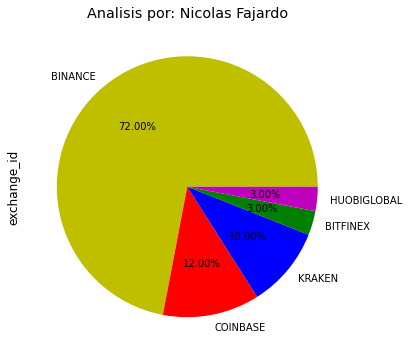

In [ ]:
#Con el orden que sale por defecto
df_B.exchange_id.value_counts().plot.pie(autopct = '%.2f%%',figsize=(6, 6),colors=['y', 'r', 'b', 'g','m'], title = 'Analisis por: Nicolas Fajardo');

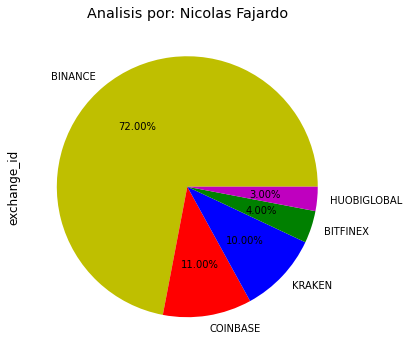

In [ ]:
#Imagen del 21 de Nov_2022
from IPython.display import Image
Image('/content/drive/MyDrive/Programacion/progresoBinanceVSotros/21_nov_2022.png')
 

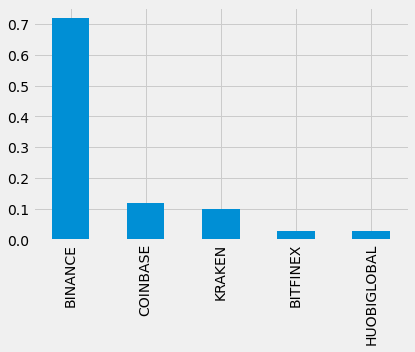

In [ ]:
plt.style.use('fivethirtyeight')
df_B.exchange_id.value_counts(normalize=True).plot.bar();

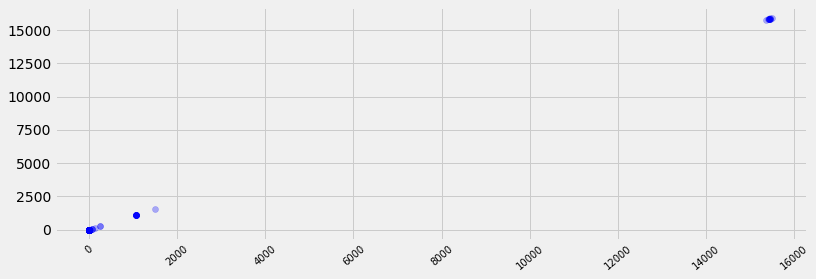

In [ ]:
f, ax = plt.subplots(figsize =(12,4))
ax.scatter(df_B.eur_price,df_B.usd_price, color ='blue',  alpha = 0.3);
plt.xticks(size = 10, rotation = 40);

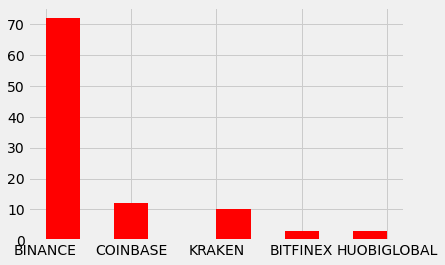

In [ ]:
f, ax = plt.subplots()
ax.hist(df_B.exchange_id, color = 'red');

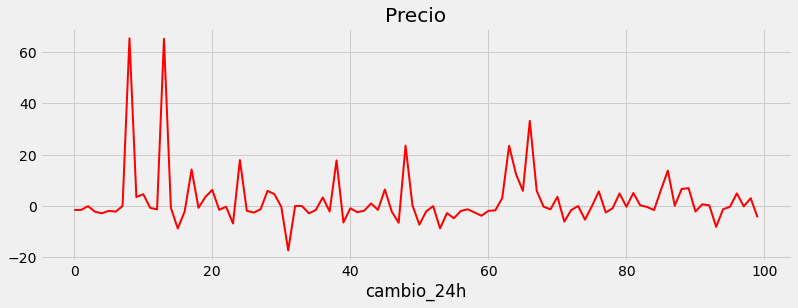

In [ ]:
df_B.change_24h.plot.line(
                        title = 'Precio',
                        xlabel = 'cambio_24h',
                        figsize = (12,4), 
                        ls = '-', 
                        linewidth = 2, 
                        color = 'red',
                        grid = True);   #👇👇👇

In [ ]:
df_B.head()

,exchange_id,symbol,base_asset,quote_asset,price,change_24h,spread,volume_24h,status,created_at,Time_delta,updated_at,eur_price,eur_price_vo_24h,usd_price,usd_price_vo_24h
0,BINANCE,BTC-USDT,BTC,USDT,15851,-1.514398,0.004789,4.398376e+09,recent,2021-09-21 01:21:25,427 days 11:42:11.496026,2022-11-22 13:03:36.496026,15433.554013,4.282325e+09,15851.803327,4.398376e+09
1,BINANCE,BTC-BUSD,BTC,BUSD,15861,-1.487744,0.010155,2.511662e+09,recent,2021-09-21 01:21:25,427 days 11:42:11.418641,2022-11-22 13:03:36.418641,15442.509529,2.445392e+09,15861.001538,2.511662e+09
2,BINANCE,BUSD-USDT,BUSD,USDT,0,-0.024965,0.009988,1.078607e+09,recent,2021-09-21 01:21:25,427 days 11:42:10.566532,2022-11-22 13:03:35.566532,0.973580,1.050148e+09,0.999964,1.078607e+09
3,BINANCE,ETH-USDT,ETH,USDT,1101,-2.206502,0.008163,9.557433e+08,recent,2021-09-21 01:21:25,427 days 11:42:10.427097,2022-11-22 13:03:35.427097,1072.114270,9.305261e+08,1101.168567,9.557433e+08
4,COINBASE,ETH-USD,ETH,USD,1101,-2.795823,0.020883,6.768305e+08,recent,2021-09-21 01:21:25,427 days 11:42:12.478305,2022-11-22 13:03:37.478305,1072.208159,6.589724e+08,1101.265000,6.768305e+08


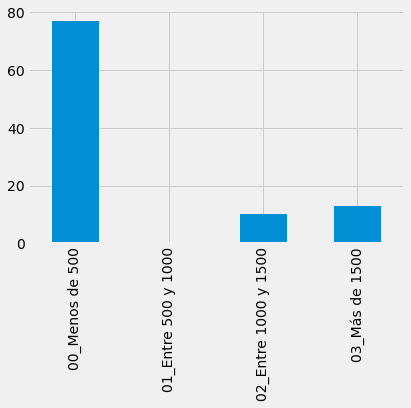

In [ ]:
#Definimos los cortes en una lista
cortes = [-float("inf"), 500, 1000, 1500, float("inf")]
nombres = ['00_Menos de 500', 
           '01_Entre 500 y 1000', 
           '02_Entre 1000 y 1500',
           '03_Más de 1500']

#Discretizamos
df_B['USDprice_Disc_Cortes'] = pd.cut(df_B['usd_price'],cortes, labels = nombres)

#Revisamos
df_B['USDprice_Disc_Cortes'].value_counts().sort_index().plot.bar();


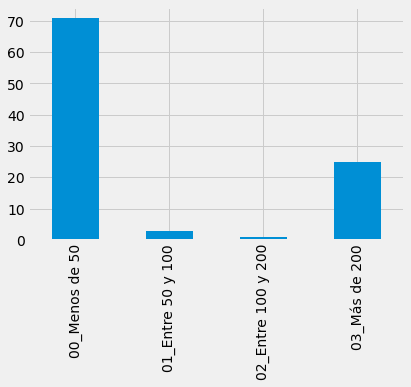

In [ ]:
#Definimos los cortes en una lista
cortes = [-float("inf"), 50, 100, 200, float("inf")]
nombres = ['00_Menos de 50', 
           '01_Entre 50 y 100', 
           '02_Entre 100 y 200',
           '03_Más de 200']

#Discretizamos
df_B['USDprice_Disc_Cortes_v2'] = pd.cut(df_B['usd_price'],cortes, labels = nombres)

#Revisamos
df_B['USDprice_Disc_Cortes_v2'].value_counts().sort_index().plot.bar();

In [ ]:
df_B.USDprice_Disc_Cortes_v2.value_counts()

00_Menos de 50        71
03_Más de 200         25
01_Entre 50 y 100      3
02_Entre 100 y 200     1
Name: USDprice_Disc_Cortes_v2, dtype: int64

In [ ]:
df_B.head(50)

,exchange_id,symbol,base_asset,quote_asset,price,change_24h,spread,volume_24h,status,created_at,Time_delta,updated_at,eur_price,eur_price_vo_24h,usd_price,usd_price_vo_24h,USDprice_Disc_Cortes,USDprice_Disc_Cortes_v2
0,BINANCE,BTC-USDT,BTC,USDT,15851,-1.514398,0.004789,4.398376e+09,recent,2021-09-21 01:21:25.000000,427 days 11:42:11.496026,2022-11-22 13:03:36.496026,15433.554013,4.282325e+09,15851.803327,4.398376e+09,03_Más de 1500,03_Más de 200
1,BINANCE,BTC-BUSD,BTC,BUSD,15861,-1.487744,0.010155,2.511662e+09,recent,2021-09-21 01:21:25.000000,427 days 11:42:11.418641,2022-11-22 13:03:36.418641,15442.509529,2.445392e+09,15861.001538,2.511662e+09,03_Más de 1500,03_Más de 200
2,BINANCE,BUSD-USDT,BUSD,USDT,0,-0.024965,0.009988,1.078607e+09,recent,2021-09-21 01:21:25.000000,427 days 11:42:10.566532,2022-11-22 13:03:35.566532,0.973580,1.050148e+09,0.999964,1.078607e+09,00_Menos de 500,00_Menos de 50
3,BINANCE,ETH-USDT,ETH,USDT,1101,-2.206502,0.008163,9.557433e+08,recent,2021-09-21 01:21:25.000000,427 days 11:42:10.427097,2022-11-22 13:03:35.427097,1072.114270,9.305261e+08,1101.168567,9.557433e+08,02_Entre 1000 y 1500,03_Más de 200
4,COINBASE,ETH-USD,ETH,USD,1101,-2.795823,0.020883,6.768305e+08,recent,2021-09-21 01:21:25.000000,427 days 11:42:12.478305,2022-11-22 13:03:37.478305,1072.208159,6.589724e+08,1101.265000,6.768305e+08,02_Entre 1000 y 1500,03_Más de 200
5,COINBASE,BTC-USD,BTC,USD,15850,-1.849815,0.011860,6.754341e+08,recent,2021-09-21 01:21:25.000000,427 days 11:42:12.479680,2022-11-22 13:03:37.479680,15432.752410,6.576128e+08,15850.980000,6.754341e+08,03_Más de 1500,03_Más de 200
6,BINANCE,ETH-BUSD,ETH,BUSD,1101,-2.177621,0.000908,5.941674e+08,recent,2021-09-21 01:21:25.000000,427 days 11:42:10.289283,2022-11-22 13:03:35.289283,1072.734522,5.784903e+08,1101.805628,5.941674e+08,02_Entre 1000 y 1500,03_Más de 200
7,KRAKEN,USDT-USD,USDT,USD,0,0.025038,0.010012,2.822399e+08,recent,2021-09-21 01:21:25.000000,427 days 11:42:10.637948,2022-11-22 13:03:35.637948,0.972398,2.747930e+08,0.998750,2.822399e+08,00_Menos de 500,00_Menos de 50
8,BINANCE,FIDA-BUSD,FIDA,BUSD,0,65.290446,0.087095,2.276271e+08,recent,2021-09-30 23:07:48.542074,417 days 13:55:50.681485,2022-11-22 13:03:39.223559,0.670767,2.216212e+08,0.688944,2.276271e+08,00_Menos de 500,00_Menos de 50
9,BINANCE,XRP-USDT,XRP,USDT,0,3.534923,0.027420,1.892081e+08,recent,2021-09-21 01:21:25.000000,427 days 11:42:12.660148,2022-11-22 13:03:37.660148,0.354608,1.842159e+08,0.364218,1.892081e+08,00_Menos de 500,00_Menos de 50


In [ ]:
def mas_pequenias(grupo):
    return(grupo['created_at'].nsmallest())

df_B.groupby(['symbol','usd_price']).apply(mas_pequenias)


symbol     usd_price      
ADA-BUSD   0.303802     78   2021-09-21 01:21:25
ADA-USD    0.303550     61   2021-09-21 01:21:25
ADA-USDT   0.303690     40   2021-09-21 01:21:25
                                     ...        
XRP-BUSD   0.364432     19   2021-09-21 01:21:25
XRP-USDT   0.364218     9    2021-09-21 01:21:25
YFII-USDT  1537.126344  31   2021-09-21 01:21:25
Name: created_at, Length: 100, dtype: datetime64[ns]

In [ ]:
#Aplicamos as_index = False
df_B.groupby(['symbol','exchange_id'],as_index = False)['usd_price', ].sum().sort_values(by = 'usd_price' , ascending = False).head(20)


#buen insight 

,symbol,exchange_id,usd_price
15,BTC-GBP,BINANCE,15922.495386
14,BTC-EUR,BINANCE,15865.636502
17,BTC-USD,BITFINEX,15863.500000
13,BTC-BUSD,BINANCE,15861.001538
93,XBT-EUR,KRAKEN,15856.928900
19,BTC-USDT,BINANCE,15851.803327
18,BTC-USD,COINBASE,15850.980000
20,BTC-USDT,COINBASE,15850.464915
21,BTC-USDT,HUOBIGLOBAL,15849.660869
94,XBT-USD,KRAKEN,15846.650000


In [ ]:
df_B.groupby('symbol')[['usd_price', 'price', 'eur_price']].transform(np.mean) #reformular

,usd_price,price,eur_price
0,15850.643037,15850.0,15432.424337
1,15861.001538,15861.0,15442.509529
2,0.999964,0.0,0.973580
...,...,...,...
97,4.180041,4.0,4.069751
98,2.079839,2.0,2.024963
99,5.128915,5.0,4.993589


In [ ]:
df_B['Usd_Ranking'] = df_B['usd_price'].rank(method = 'first', ascending = False)

In [ ]:
df_B.sort_values(by = 'Usd_Ranking')

,exchange_id,symbol,base_asset,quote_asset,price,change_24h,spread,volume_24h,status,created_at,Time_delta,updated_at,eur_price,eur_price_vo_24h,usd_price,usd_price_vo_24h,USDprice_Disc_Cortes,USDprice_Disc_Cortes_v2,Usd_Ranking
90,BINANCE,BTC-GBP,BTC,GBP,15922,-2.120624,0.067645,1.829687e+07,recent,2021-09-21 01:21:25.000000,427 days 11:42:12.904881,2022-11-22 13:03:37.904881,15502.380865,1.781411e+07,15922.495386,1.829687e+07,03_Más de 1500,03_Más de 200,1.0
25,BINANCE,BTC-EUR,BTC,EUR,15865,-1.819963,0.015994,6.844751e+07,recent,2021-09-21 01:21:25.000000,427 days 11:42:12.802334,2022-11-22 13:03:37.802334,15447.022201,6.664153e+07,15865.636502,6.844751e+07,03_Más de 1500,03_Más de 200,2.0
26,BITFINEX,BTC-USD,BTC,USD,15863,-2.540394,0.006304,6.624977e+07,recent,2021-09-21 01:21:25.000000,427 days 11:42:14.412655,2022-11-22 13:03:39.412655,15444.942070,6.450177e+07,15863.500000,6.624977e+07,03_Más de 1500,03_Más de 200,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38,BINANCE,VIDT-USDT,VIDT,USDT,0,17.772036,0.097466,4.696669e+07,recent,2021-09-21 01:21:25.000000,427 days 11:42:10.219717,2022-11-22 13:03:35.219717,0.039890,4.572747e+07,0.040971,4.696669e+07,00_Menos de 500,00_Menos de 50,98.0
46,BINANCE,LUNC-BUSD,LUNC,BUSD,0,-2.139800,0.026501,3.409071e+07,recent,2022-05-31 11:04:31.770466,175 days 01:59:06.512182,2022-11-22 13:03:38.282648,0.000147,3.319123e+07,0.000151,3.409071e+07,00_Menos de 500,00_Menos de 50,99.0
54,BINANCE,SHIB-USDT,SHIB,USDT,0,-2.719907,0.118906,2.818497e+07,recent,2021-09-21 01:21:25.000000,427 days 11:42:15.674759,2022-11-22 13:03:40.674759,0.000008,2.744132e+07,0.000008,2.818497e+07,00_Menos de 500,00_Menos de 50,100.0


In [ ]:
df_B.to_excel('Api_Biance.xlsx',
              sheet_name='Sheet_name_1') #pasar a Tableau